# Insurance Claims Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

Importing required libraries

In [2]:
df=pd.read_csv("insurance.csv")

Importing dataset

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Sample data of dataset

As we want to predict fraud or not we want to build classification model

In [4]:
df.shape

(1000, 40)

Dataset have 1000 rows and 40 columns

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Column _c39 contains missing values let's drop it

In [6]:
df.drop(['_c39'],axis=1,inplace=True)

Dropped

In [7]:
df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N


Dropped one column

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Statistical summary of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Datatypes,null values and memory usage of dataset

In [10]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [11]:
categorical=[['policy_bind_date','policy_csl','policy_state','insured_sex','insured_education_level','insured_occupation',
             'insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity',
             'authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available',
             'auto_make','auto_model','fraud_reported']].copy()

Stored categorical varibales

In [12]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Unique values of each columns

In [13]:
categorical

[['policy_bind_date',
  'policy_csl',
  'policy_state',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_hobbies',
  'insured_relationship',
  'incident_date',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'incident_location',
  'property_damage',
  'police_report_available',
  'auto_make',
  'auto_model',
  'fraud_reported']]

# Visualizations

In [14]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

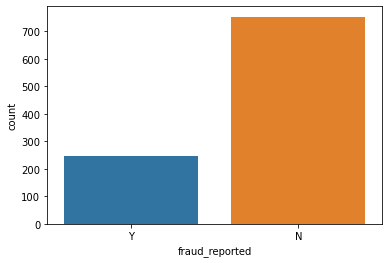

N    753
Y    247
Name: fraud_reported, dtype: int64

In [15]:
sns.countplot('fraud_reported',data=df)
plt.show()
df['fraud_reported'].value_counts()

Most of the claims were not fraud and as this is our target column we can observe the imbalance  

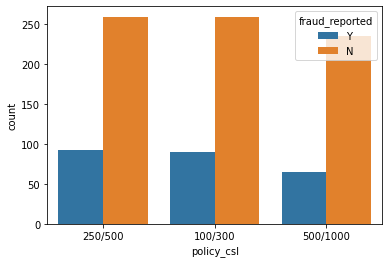

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [16]:
sns.countplot(x='policy_csl',hue='fraud_reported',data=df)
plt.show()
df['policy_csl'].value_counts()

Most of the csl is 250/300 and csl at 100/300 and 500/250 were fraud

In [17]:
categorical

[['policy_bind_date',
  'policy_csl',
  'policy_state',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_hobbies',
  'insured_relationship',
  'incident_date',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'incident_location',
  'property_damage',
  'police_report_available',
  'auto_make',
  'auto_model',
  'fraud_reported']]

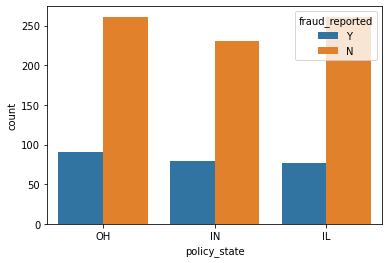

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [18]:
sns.countplot(x='policy_state',hue='fraud_reported',data=df)
plt.show()
df['policy_state'].value_counts()

Most of the insurance claimed in ohio state and also most fraud detected in ohio state

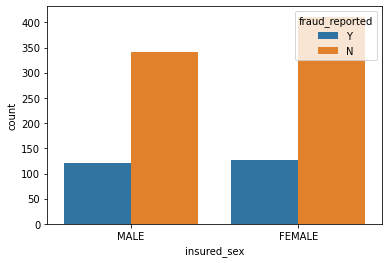

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [19]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)
plt.show()
df['insured_sex'].value_counts()

 Most of the insurance claimed for female and also fraud detection is same

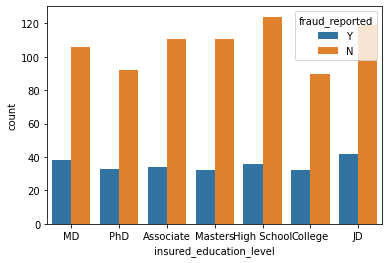

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [20]:
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)
plt.show()
df['insured_education_level'].value_counts()

Most of them where JD(Juris Doctor) graduates and most of the fraud dtecetd in JD graduates

In [21]:
categorical

[['policy_bind_date',
  'policy_csl',
  'policy_state',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_hobbies',
  'insured_relationship',
  'incident_date',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'incident_location',
  'property_damage',
  'police_report_available',
  'auto_make',
  'auto_model',
  'fraud_reported']]

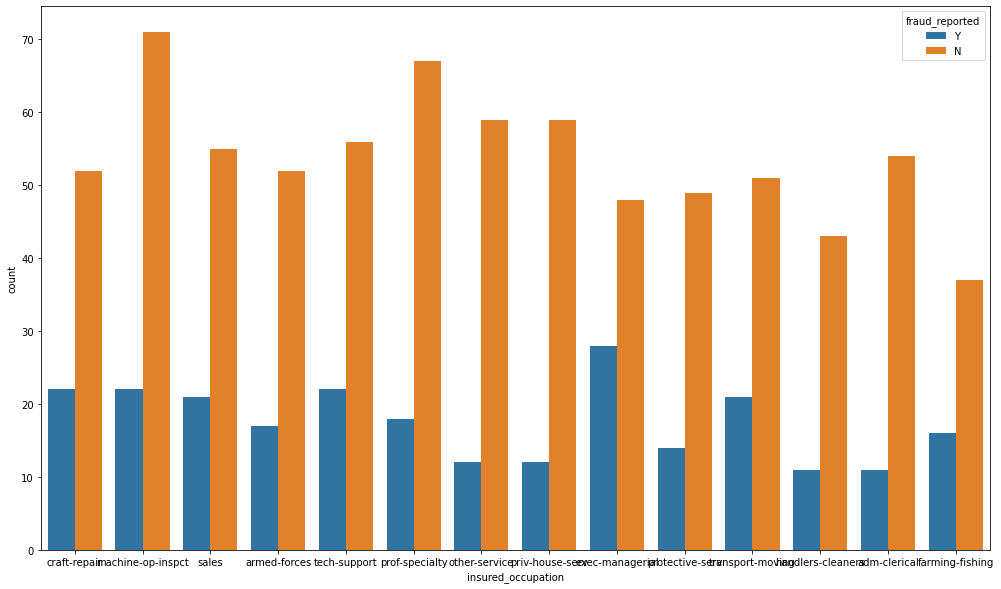

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [22]:
plt.figure(figsize=(17,10))
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)
plt.show()
df['insured_occupation'].value_counts()

Most of them have machine operating inspectors and most of the fraud detected in executive managers

In [23]:
categorical

[['policy_bind_date',
  'policy_csl',
  'policy_state',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_hobbies',
  'insured_relationship',
  'incident_date',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'incident_location',
  'property_damage',
  'police_report_available',
  'auto_make',
  'auto_model',
  'fraud_reported']]

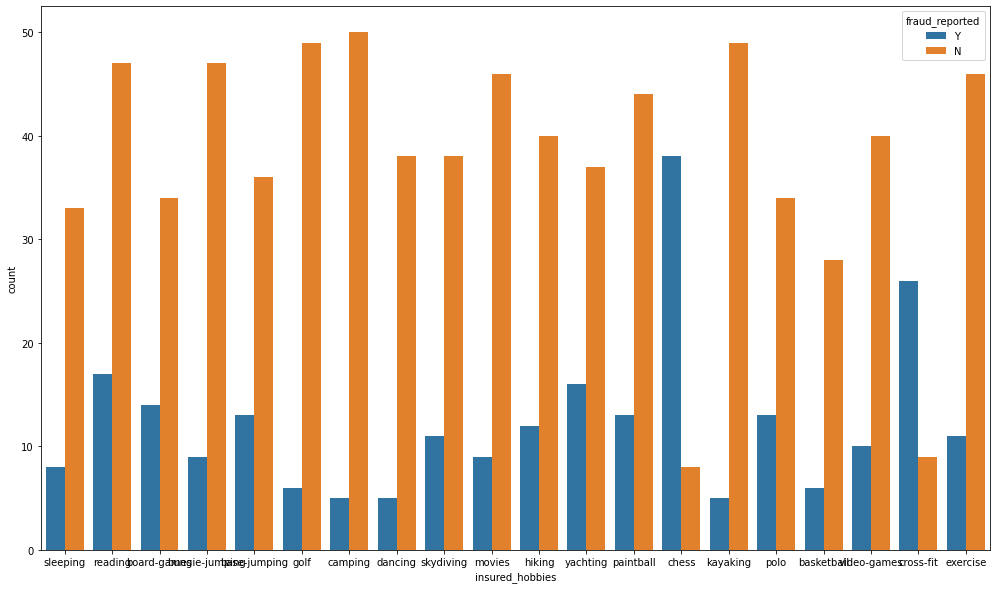

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [24]:
plt.figure(figsize=(17,10))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.show()
df['insured_hobbies'].value_counts()

Most of them were have hobby of reading but most fraud were have hobby of playing chess

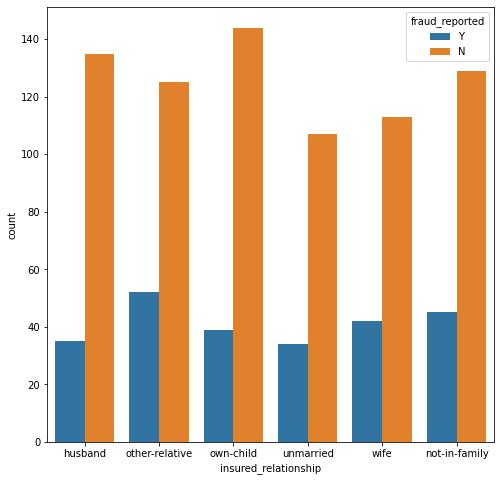

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.show()
df['insured_relationship'].value_counts()

Most of them were their own child but fraud detected mostly with relation of other relative

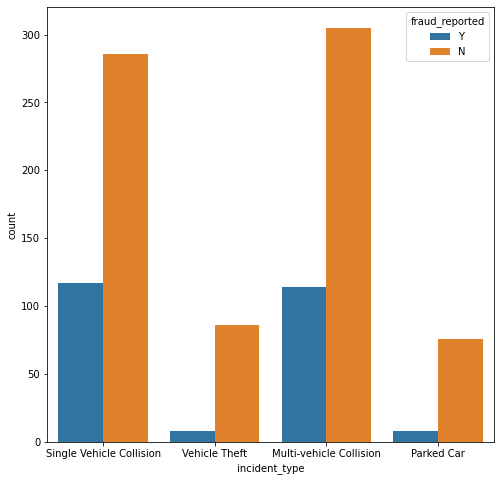

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)
plt.show()
df['incident_type'].value_counts()

Most of the incident type is multi vehicle collision,fraud where detected in both multi vehicle and single vehicle collision

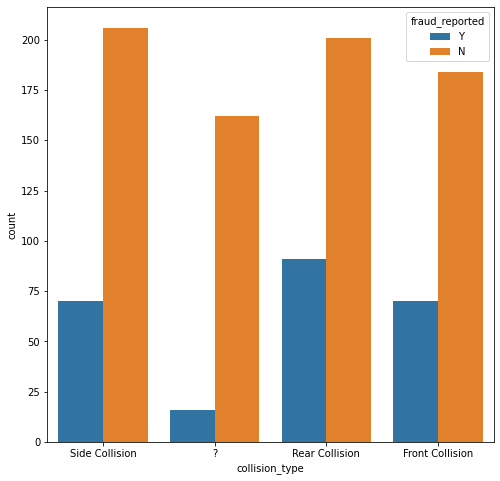

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)
plt.show()
df['collision_type'].value_counts()

Most of them were rear type collision and also most fraud detect from reartype collision.Here there is '?' upto 178 datas we want to replace it with mode.

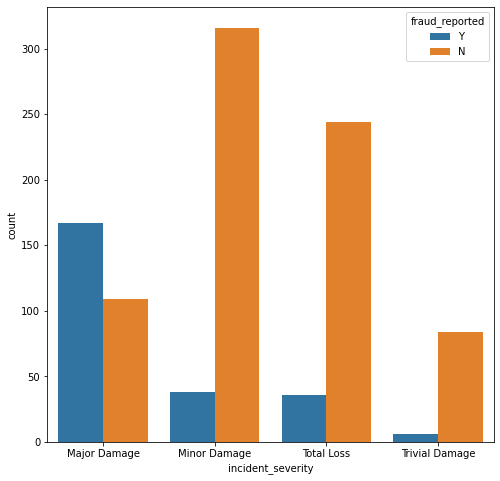

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)
plt.show()
df['incident_severity'].value_counts()

Most of the damage where minor damage but fraud detected mostly in major damage

In [29]:
categorical

[['policy_bind_date',
  'policy_csl',
  'policy_state',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_hobbies',
  'insured_relationship',
  'incident_date',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'incident_location',
  'property_damage',
  'police_report_available',
  'auto_make',
  'auto_model',
  'fraud_reported']]

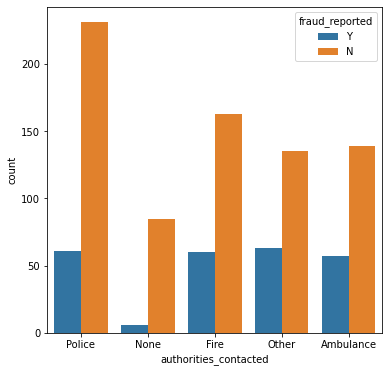

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)
plt.show()
df['authorities_contacted'].value_counts()

Most of the authorities were police and also fraud detected mostly in both police and fire authorities

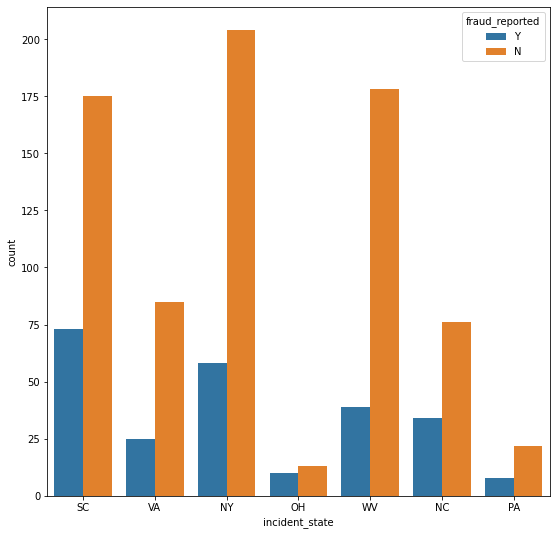

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [31]:
plt.figure(figsize=(9,9))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)
plt.show()
df['incident_state'].value_counts()

Most of incidents happen in new york but most fraud were detec in south carolin state

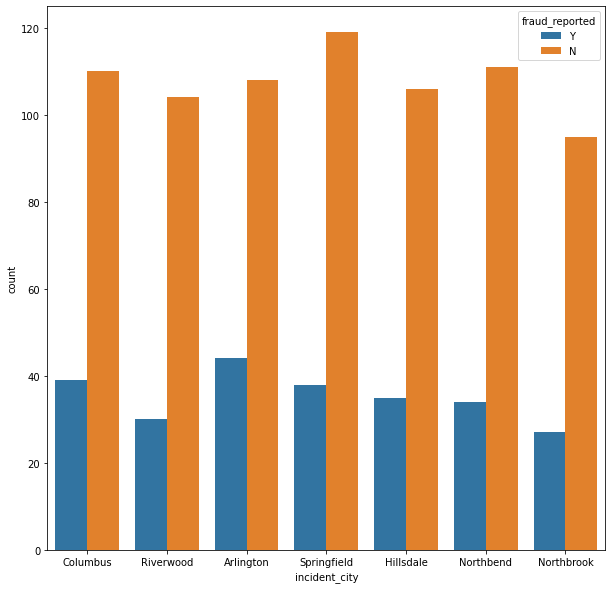

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)
plt.show()
df['incident_city'].value_counts()

Most of incident occured in springfield city,fraud detected mostly in arlington city

In [33]:
categorical

[['policy_bind_date',
  'policy_csl',
  'policy_state',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_hobbies',
  'insured_relationship',
  'incident_date',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'incident_location',
  'property_damage',
  'police_report_available',
  'auto_make',
  'auto_model',
  'fraud_reported']]

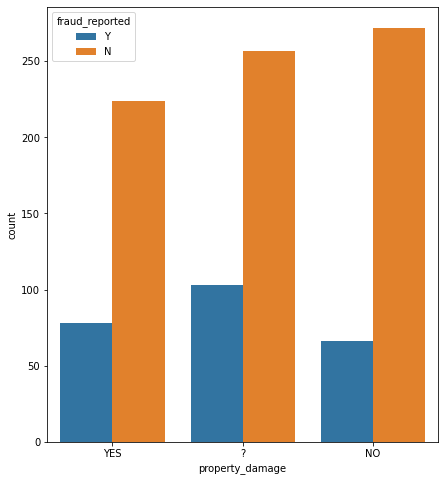

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [34]:
plt.figure(figsize=(7,8))
sns.countplot(x='property_damage',hue='fraud_reported',data=df)
plt.show()
df['property_damage'].value_counts()

here '?' are most.want to replace it

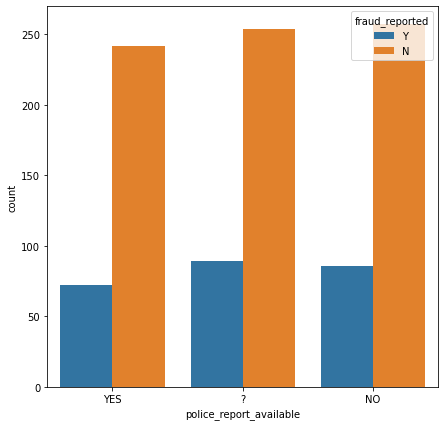

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [35]:
plt.figure(figsize=(7,7))
sns.countplot(x='police_report_available',hue='fraud_reported',data=df)
plt.show()
df['police_report_available'].value_counts()

Most of them were report not available and here also '?' available

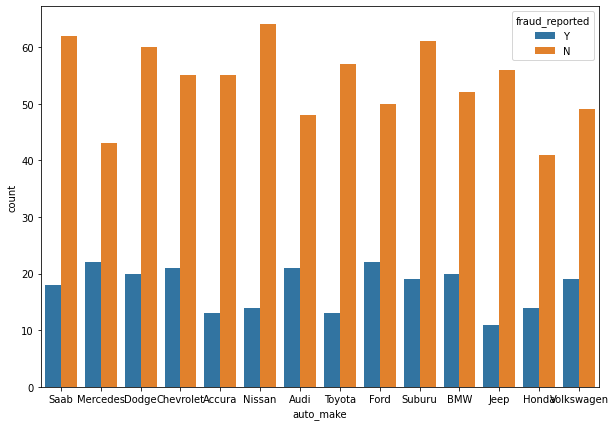

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)
plt.show()
df['auto_make'].value_counts()

Most of the company where dodge,saab,suburu most fraud reported of benz,ford

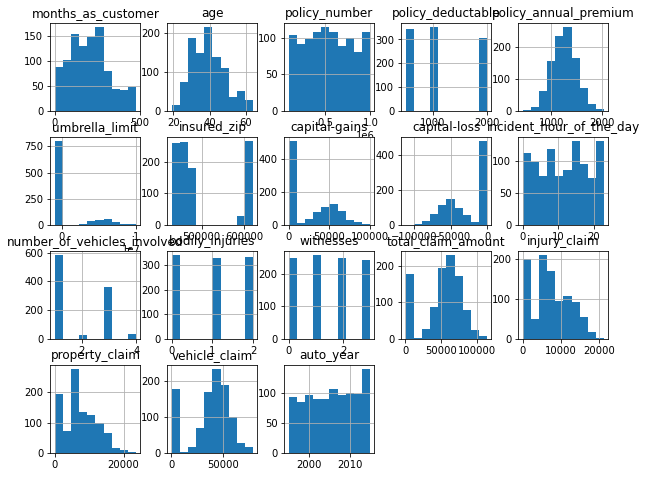

In [37]:
df.hist(figsize=(10,10),layout=(5,5))
plt.show()

policy annual premium is between 1000-1500 and also distribution of data

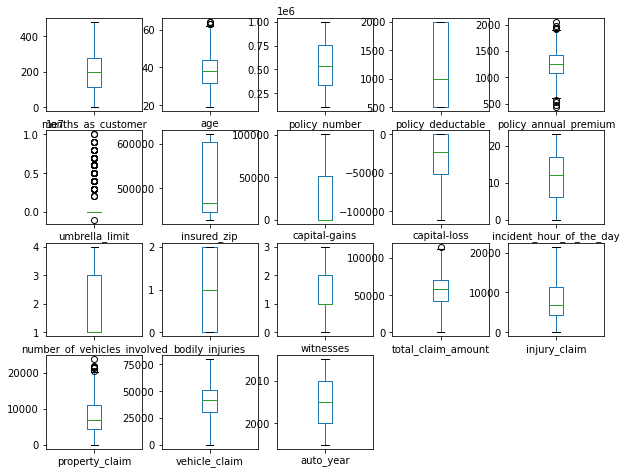

In [38]:
df.plot(kind='box',figsize=(10,10),layout=(5,5),sharex=False,subplots=True)
plt.show()

In some columns samll outliers are present

# Data Cleaning

In [39]:
categorical

[['policy_bind_date',
  'policy_csl',
  'policy_state',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_hobbies',
  'insured_relationship',
  'incident_date',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'incident_location',
  'property_damage',
  'police_report_available',
  'auto_make',
  'auto_model',
  'fraud_reported']]

In [40]:
df['incident_date'].unique

<bound method Series.unique of 0      25-01-2015
1      21-01-2015
2      22-02-2015
3      10-01-2015
4      17-02-2015
          ...    
995    22-02-2015
996    24-01-2015
997    23-01-2015
998    26-02-2015
999    26-02-2015
Name: incident_date, Length: 1000, dtype: object>

In [41]:
df['policy_bind_day']=pd.to_datetime(df.policy_bind_date,format="%d-%m-%Y").dt.day

df['policy_bind_month']=pd.to_datetime(df.policy_bind_date,format="%d-%m-%Y").dt.month

df['policy_bind_year']=pd.to_datetime(df.policy_bind_date,format="%d-%m-%Y").dt.year



#dropping ploicy bind date column
df.drop(['policy_bind_date'],axis=1,inplace=True)

Date column converted into day,month,year and column with date dropped

In [42]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,27,6,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


 columns new created

In [43]:
df['incident_day']=pd.to_datetime(df.incident_date,format="%d-%m-%Y").dt.day

df['incident_month']=pd.to_datetime(df.incident_date,format="%d-%m-%Y").dt.month

#dropping incident date column
df.drop(['incident_date'],axis=1,inplace=True)

Seperated date column into day and month and dropped date column year of the date is same 

In [44]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,17,10,2014,25,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,27,6,2006,21,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,6,9,2000,22,2
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,6,6,2014,17,2


In [45]:
df['property_damage'].mode()[0]

'?'

We can't replace it by mode

In [46]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

Now we can replace it by 'NO ' because among yes or no most ofthem were NO

In [47]:
df['property_damage'] = df['property_damage'].apply(lambda x: x.replace('?', 'NO'))

In [48]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

Now counts of '?' and NO were combined and replaced

In [49]:
df['collision_type'].mode()[0]

'Rear Collision'

We can replace '?' with 'Rear collision'

In [50]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [51]:
df['collision_type'] = df['collision_type'].apply(lambda x: x.replace('?', 'Rear Collision'))

Replaced

In [52]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

Replaced '?'

In [53]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

We can replace '?' with 'NO'

In [54]:
df['police_report_available'] = df['police_report_available'].apply(lambda x: x.replace('?', 'NO'))

Replaced using lambda function

In [55]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

Replaced

In [56]:
categorical

[['policy_bind_date',
  'policy_csl',
  'policy_state',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_hobbies',
  'insured_relationship',
  'incident_date',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'incident_location',
  'property_damage',
  'police_report_available',
  'auto_make',
  'auto_model',
  'fraud_reported']]

# Encoding

In [57]:
for i in df.columns:
    if df[i].dtype==np.number:
        continue
    df[i]=LabelEncoder().fit_transform(df[i])

Encoded all categorical column using label encoder

In [58]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,299,29,480,2,1,1,1406.91,1,486,1,...,545,10,1,9,1,16,9,24,24,0
1,212,23,257,1,1,2,1197.22,5,519,1,...,38,8,12,12,1,26,5,16,20,0
2,123,10,672,2,0,2,1413.14,5,6,0,...,116,4,30,12,0,5,8,10,21,1
3,239,22,140,0,1,2,1415.74,6,812,0,...,521,3,34,19,1,24,4,0,9,0
4,212,25,286,0,2,1,1583.91,6,850,1,...,66,0,31,14,0,5,5,24,16,1


Dataset after encoding

# Correlation

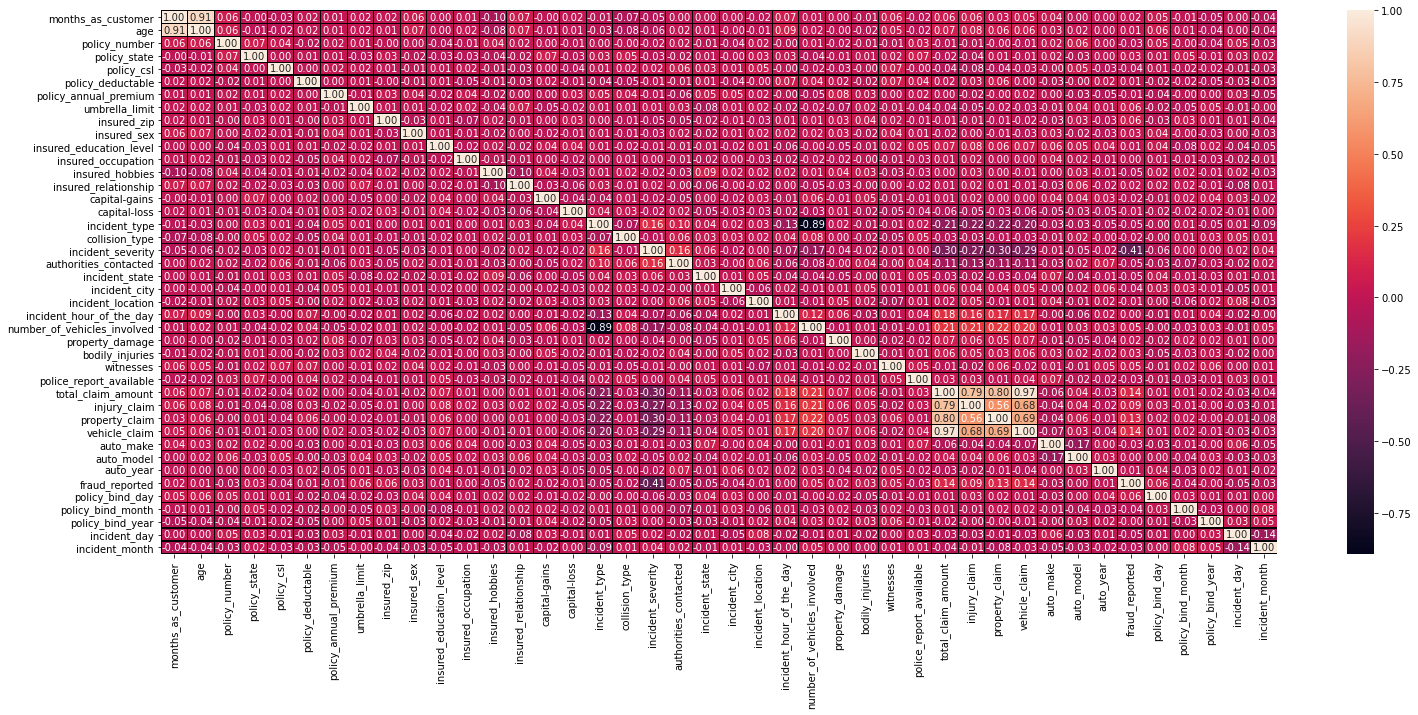

In [59]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

Injury claim and total claim amount are correlated,property claim and total claim amount were correlated to each other,vehicle claim,property claim are highyly correlated,number of vehicles involved and incident type are highly negatively correalted

# Seperating Features And Target

In [60]:
x=df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

Seperated

In [61]:
x.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,299,29,480,2,1,1,1406.91,1,486,1,...,512,545,10,1,9,16,9,24,24,0
1,212,23,257,1,1,2,1197.22,5,519,1,...,45,38,8,12,12,26,5,16,20,0
2,123,10,672,2,0,2,1413.14,5,6,0,...,104,116,4,30,12,5,8,10,21,1
3,239,22,140,0,1,2,1415.74,6,812,0,...,249,521,3,34,19,24,4,0,9,0
4,212,25,286,0,2,1,1583.91,6,850,1,...,36,66,0,31,14,5,5,24,16,1


Feature data

In [62]:
pd.DataFrame(y.head())

,fraud_reported
0,1
1,1
2,0
3,1
4,0


Target variable

# Scaling

In [63]:
sc=StandardScaler()
x=sc.fit_transform(x)

Scaled Features

# Balancing

# OverSampling

In [64]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Balanced using somte technique

In [65]:
y.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

Balanced

# Model Building

In [66]:
#logistic regression
lr=LogisticRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training accuarcy is:- 0.7608503100088574
At random state 0,the testing accuracy is:- 0.7320954907161804


At random state 1,the training accuarcy is:- 0.7581930912311781
At random state 1,the testing accuracy is:- 0.7400530503978779


At random state 2,the training accuarcy is:- 0.7511071744906997
At random state 2,the testing accuracy is:- 0.7427055702917772


At random state 3,the training accuarcy is:- 0.7519929140832595
At random state 3,the testing accuracy is:- 0.753315649867374


At random state 3 model performs well
At random state 4,the training accuarcy is:- 0.7661647475642162
At random state 4,the testing accuracy is:- 0.7188328912466844


At random state 5,the training accuarcy is:- 0.770593445527015
At random state 5,the testing accuracy is:- 0.7480106100795756


At random state 6,the training accuarcy is:- 0.7519929140832595
At random state 6,the testing accuracy is:- 0.7453580901856764


At random state 6 model performs well
At random state 7,the t

At random state 63,the testing accuracy is:- 0.7161803713527851


At random state 64,the training accuarcy is:- 0.770593445527015
At random state 64,the testing accuracy is:- 0.6843501326259946


At random state 65,the training accuarcy is:- 0.75022143489814
At random state 65,the testing accuracy is:- 0.7347480106100795


At random state 66,the training accuarcy is:- 0.7519929140832595
At random state 66,the testing accuracy is:- 0.7241379310344828


At random state 67,the training accuarcy is:- 0.7626217891939769
At random state 67,the testing accuracy is:- 0.7294429708222812


At random state 68,the training accuarcy is:- 0.7555358724534986
At random state 68,the testing accuracy is:- 0.7612732095490716


At random state 68 model performs well
At random state 69,the training accuarcy is:- 0.7511071744906997
At random state 69,the testing accuracy is:- 0.7374005305039788


At random state 70,the training accuarcy is:- 0.7635075287865367
At random state 70,the testing accuracy is:- 0.

At random state 124,the testing accuracy is:- 0.753315649867374


At random state 125,the training accuarcy is:- 0.7528786536758193
At random state 125,the testing accuracy is:- 0.7427055702917772


At random state 126,the training accuarcy is:- 0.770593445527015
At random state 126,the testing accuracy is:- 0.713527851458886


At random state 127,the training accuarcy is:- 0.7564216120460585
At random state 127,the testing accuracy is:- 0.753315649867374


At random state 128,the training accuarcy is:- 0.7590788308237378
At random state 128,the testing accuracy is:- 0.7320954907161804


At random state 129,the training accuarcy is:- 0.7590788308237378
At random state 129,the testing accuracy is:- 0.7453580901856764


At random state 130,the training accuarcy is:- 0.7466784765279008
At random state 130,the testing accuracy is:- 0.7480106100795756


At random state 130 model performs well
At random state 131,the training accuarcy is:- 0.7617360496014172
At random state 131,the testing a

At random state 190,the training accuarcy is:- 0.7511071744906997
At random state 190,the testing accuracy is:- 0.753315649867374


At random state 190 model performs well
At random state 191,the training accuarcy is:- 0.7511071744906997
At random state 191,the testing accuracy is:- 0.7082228116710876


At random state 192,the training accuarcy is:- 0.7484499557130204
At random state 192,the testing accuracy is:- 0.7241379310344828


At random state 193,the training accuarcy is:- 0.7581930912311781
At random state 193,the testing accuracy is:- 0.7347480106100795


At random state 194,the training accuarcy is:- 0.745792736935341
At random state 194,the testing accuracy is:- 0.7639257294429708


At random state 195,the training accuarcy is:- 0.7617360496014172
At random state 195,the testing accuracy is:- 0.7374005305039788


At random state 196,the training accuarcy is:- 0.7511071744906997
At random state 196,the testing accuracy is:- 0.7294429708222812


At random state 197,the trainin

Splitted into trained and test data and finding best random state for logistic regression

In [67]:
l

[3,
 6,
 8,
 20,
 24,
 30,
 45,
 47,
 68,
 77,
 79,
 80,
 85,
 87,
 95,
 99,
 116,
 130,
 137,
 143,
 149,
 150,
 152,
 153,
 161,
 171,
 190]

List of best random states

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=194)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc_l=classification_report(y_test,predlr)
print(acc_l)
print(confusion_matrix(y_test,predlr))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       192
           1       0.75      0.78      0.76       185

    accuracy                           0.76       377
   macro avg       0.76      0.76      0.76       377
weighted avg       0.76      0.76      0.76       377

[[144  48]
 [ 41 144]]


Applying best random state and printing accuracy and cofusion matrix

In [69]:
#decision tree classifier
dt=DecisionTreeClassifier()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.8037135278514589


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.8514588859416445


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.8488063660477454


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.8461538461538461


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.8567639257294429


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.883289124668435


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.8753315649867374


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.8355437665782494


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy i

At random state 73,the testing accuracy is:- 0.8381962864721485


At random state 74,the training accuarcy is:- 1.0
At random state 74,the testing accuracy is:- 0.8408488063660478


At random state 75,the training accuarcy is:- 1.0
At random state 75,the testing accuracy is:- 0.8620689655172413


At random state 76,the training accuarcy is:- 1.0
At random state 76,the testing accuracy is:- 0.8461538461538461


At random state 77,the training accuarcy is:- 1.0
At random state 77,the testing accuracy is:- 0.8461538461538461


At random state 78,the training accuarcy is:- 1.0
At random state 78,the testing accuracy is:- 0.8063660477453581


At random state 79,the training accuarcy is:- 1.0
At random state 79,the testing accuracy is:- 0.8567639257294429


At random state 80,the training accuarcy is:- 1.0
At random state 80,the testing accuracy is:- 0.8063660477453581


At random state 81,the training accuarcy is:- 1.0
At random state 81,the testing accuracy is:- 0.8090185676392573


At ran

At random state 144,the training accuarcy is:- 1.0
At random state 144,the testing accuracy is:- 0.8328912466843501


At random state 145,the training accuarcy is:- 1.0
At random state 145,the testing accuracy is:- 0.8355437665782494


At random state 146,the training accuarcy is:- 1.0
At random state 146,the testing accuracy is:- 0.8328912466843501


At random state 147,the training accuarcy is:- 1.0
At random state 147,the testing accuracy is:- 0.8143236074270557


At random state 148,the training accuarcy is:- 1.0
At random state 148,the testing accuracy is:- 0.8116710875331565


At random state 149,the training accuarcy is:- 1.0
At random state 149,the testing accuracy is:- 0.8249336870026526


At random state 150,the training accuarcy is:- 1.0
At random state 150,the testing accuracy is:- 0.8594164456233422


At random state 151,the training accuarcy is:- 1.0
At random state 151,the testing accuracy is:- 0.8328912466843501


At random state 152,the training accuarcy is:- 1.0
At ra

Splitting data into trained and test data , finding best random states for decision tree

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
acc_d=classification_report(y_test,preddt)
print(acc_d)
print(confusion_matrix(y_test,preddt))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       177
           1       0.84      0.84      0.84       200

    accuracy                           0.84       377
   macro avg       0.83      0.83      0.83       377
weighted avg       0.84      0.84      0.84       377

[[146  31]
 [ 31 169]]


Applied best random state and print accuracy,confusion matrix.precision,recall for decision tree

In [71]:
#Kneighbors classifier 
kn=KNeighborsClassifier()
k=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,the training accuarcy is:- 0.7094774136403897
At random state 0,the testing accuracy is:- 0.6180371352785146


At random state 1,the training accuarcy is:- 0.7209920283436669
At random state 1,the testing accuracy is:- 0.583554376657825


At random state 2,the training accuarcy is:- 0.7147918511957484
At random state 2,the testing accuracy is:- 0.6525198938992043


At random state 3,the training accuarcy is:- 0.7165633303808681
At random state 3,the testing accuracy is:- 0.5915119363395226


At random state 4,the training accuarcy is:- 0.704162976085031
At random state 4,the testing accuracy is:- 0.6021220159151194


At random state 5,the training accuarcy is:- 0.7103631532329495
At random state 5,the testing accuracy is:- 0.623342175066313


At random state 6,the training accuarcy is:- 0.728963684676705
At random state 6,the testing accuracy is:- 0.5994694960212201


At random state 7,the training accuarcy is:- 0.7280779450841453
At random state 7,the testing accurac

At random state 64,the training accuarcy is:- 0.7121346324180691
At random state 64,the testing accuracy is:- 0.6631299734748011


At random state 65,the training accuarcy is:- 0.6970770593445527
At random state 65,the testing accuracy is:- 0.6259946949602122


At random state 66,the training accuarcy is:- 0.7068201948627104
At random state 66,the testing accuracy is:- 0.6339522546419099


At random state 67,the training accuarcy is:- 0.7077059344552702
At random state 67,the testing accuracy is:- 0.6312997347480106


At random state 68,the training accuarcy is:- 0.6961913197519929
At random state 68,the testing accuracy is:- 0.6445623342175066


At random state 69,the training accuarcy is:- 0.7103631532329495
At random state 69,the testing accuracy is:- 0.6180371352785146


At random state 70,the training accuarcy is:- 0.7094774136403897
At random state 70,the testing accuracy is:- 0.623342175066313


At random state 71,the training accuarcy is:- 0.7050487156775908
At random state 71,

At random state 126,the testing accuracy is:- 0.6737400530503979


At random state 127,the training accuarcy is:- 0.7174490699734278
At random state 127,the testing accuracy is:- 0.5888594164456233


At random state 128,the training accuarcy is:- 0.7156775907883083
At random state 128,the testing accuracy is:- 0.6472148541114059


At random state 129,the training accuarcy is:- 0.7139061116031886
At random state 129,the testing accuracy is:- 0.6286472148541115


At random state 130,the training accuarcy is:- 0.7068201948627104
At random state 130,the testing accuracy is:- 0.5809018567639257


At random state 131,the training accuarcy is:- 0.7201062887511072
At random state 131,the testing accuracy is:- 0.6604774535809018


At random state 132,the training accuarcy is:- 0.7139061116031886
At random state 132,the testing accuracy is:- 0.6286472148541115


At random state 133,the training accuarcy is:- 0.7059344552701505
At random state 133,the testing accuracy is:- 0.6206896551724138


At

At random state 190,the training accuarcy is:- 0.7103631532329495
At random state 190,the testing accuracy is:- 0.6631299734748011


At random state 191,the training accuarcy is:- 0.7156775907883083
At random state 191,the testing accuracy is:- 0.583554376657825


At random state 192,the training accuarcy is:- 0.7103631532329495
At random state 192,the testing accuracy is:- 0.5862068965517241


At random state 193,the training accuarcy is:- 0.7050487156775908
At random state 193,the testing accuracy is:- 0.6127320954907162


At random state 194,the training accuarcy is:- 0.7103631532329495
At random state 194,the testing accuracy is:- 0.6153846153846154


At random state 195,the training accuarcy is:- 0.7130203720106288
At random state 195,the testing accuracy is:- 0.5915119363395226


At random state 196,the training accuarcy is:- 0.7015057573073517
At random state 196,the testing accuracy is:- 0.6206896551724138


At random state 197,the training accuarcy is:- 0.7077059344552702
At r

Splitted data into trained and test data and finding best random states for kneihbors classifier

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=199)
kn.fit(x_train,y_train)
predknn=kn.predict(x_test)
acc_k=classification_report(y_test,predknn)
print(acc_k)
print(confusion_matrix(y_test,predknn))

              precision    recall  f1-score   support

           0       0.88      0.24      0.38       177
           1       0.59      0.97      0.73       200

    accuracy                           0.63       377
   macro avg       0.73      0.61      0.56       377
weighted avg       0.73      0.63      0.57       377

[[ 43 134]
 [  6 194]]


Applied best random state and print accuracy score,confusion matrix,recall for kneighbors classifier

# Ensemble Technique

In [73]:
#Random Forest classifier 
rf=RandomForestClassifier()
r=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        r.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.8541114058355438


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.8673740053050398


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.870026525198939


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.9018567639257294


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.8779840848806366


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.8726790450928382


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.8753315649867374


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.8673740053050398


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy i

At random state 71,the training accuarcy is:- 1.0
At random state 71,the testing accuracy is:- 0.8779840848806366


At random state 72,the training accuarcy is:- 1.0
At random state 72,the testing accuracy is:- 0.8594164456233422


At random state 73,the training accuarcy is:- 1.0
At random state 73,the testing accuracy is:- 0.883289124668435


At random state 74,the training accuarcy is:- 1.0
At random state 74,the testing accuracy is:- 0.883289124668435


At random state 75,the training accuarcy is:- 1.0
At random state 75,the testing accuracy is:- 0.8806366047745358


At random state 76,the training accuarcy is:- 1.0
At random state 76,the testing accuracy is:- 0.8726790450928382


At random state 77,the training accuarcy is:- 1.0
At random state 77,the testing accuracy is:- 0.8938992042440318


At random state 78,the training accuarcy is:- 1.0
At random state 78,the testing accuracy is:- 0.8779840848806366


At random state 79,the training accuarcy is:- 1.0
At random state 79,the t

At random state 142,the training accuarcy is:- 1.0
At random state 142,the testing accuracy is:- 0.8938992042440318


At random state 143,the training accuarcy is:- 1.0
At random state 143,the testing accuracy is:- 0.8912466843501327


At random state 144,the training accuarcy is:- 1.0
At random state 144,the testing accuracy is:- 0.8912466843501327


At random state 145,the training accuarcy is:- 1.0
At random state 145,the testing accuracy is:- 0.8567639257294429


At random state 146,the training accuarcy is:- 1.0
At random state 146,the testing accuracy is:- 0.8673740053050398


At random state 147,the training accuarcy is:- 1.0
At random state 147,the testing accuracy is:- 0.8912466843501327


At random state 148,the training accuarcy is:- 1.0
At random state 148,the testing accuracy is:- 0.8938992042440318


At random state 149,the training accuarcy is:- 1.0
At random state 149,the testing accuracy is:- 0.8647214854111406


At random state 150,the training accuarcy is:- 1.0
At ra

Splitted data into trained and test data and finding best random states for random forest classifier

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=198)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc_r=classification_report(y_test,predrf)
print(acc_r)
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       195
           1       0.90      0.90      0.90       182

    accuracy                           0.90       377
   macro avg       0.90      0.90      0.90       377
weighted avg       0.90      0.90      0.90       377

[[177  18]
 [ 19 163]]


Applying best random state and printing accuracy,confusion matrix , f1 score for random forest

In [75]:
#adaboostclassifier
ad=AdaBoostClassifier()
a=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    ad.fit(x_train,y_train)
    pred_train=ad.predict(x_train)
    pred_test=ad.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        a.append(i)

At random state 0,the training accuarcy is:- 0.9069973427812223
At random state 0,the testing accuracy is:- 0.8408488063660478


At random state 1,the training accuarcy is:- 0.9052258635961028
At random state 1,the testing accuracy is:- 0.8328912466843501


At random state 2,the training accuarcy is:- 0.9052258635961028
At random state 2,the testing accuracy is:- 0.8620689655172413


At random state 3,the training accuarcy is:- 0.8866253321523472
At random state 3,the testing accuracy is:- 0.8859416445623343


At random state 3 model performs well
At random state 4,the training accuarcy is:- 0.9007971656333038
At random state 4,the testing accuracy is:- 0.8620689655172413


At random state 5,the training accuarcy is:- 0.895482728077945
At random state 5,the testing accuracy is:- 0.8461538461538461


At random state 6,the training accuarcy is:- 0.9069973427812223
At random state 6,the testing accuracy is:- 0.8647214854111406


At random state 7,the training accuarcy is:- 0.9105403011514

At random state 63,the training accuarcy is:- 0.8919397697077059
At random state 63,the testing accuracy is:- 0.8328912466843501


At random state 64,the training accuarcy is:- 0.9025686448184234
At random state 64,the testing accuracy is:- 0.8461538461538461


At random state 65,the training accuarcy is:- 0.8972542072630647
At random state 65,the testing accuracy is:- 0.8673740053050398


At random state 66,the training accuarcy is:- 0.9007971656333038
At random state 66,the testing accuracy is:- 0.830238726790451


At random state 67,the training accuarcy is:- 0.8937112488928255
At random state 67,the testing accuracy is:- 0.8673740053050398


At random state 68,the training accuarcy is:- 0.8945969884853853
At random state 68,the testing accuracy is:- 0.8647214854111406


At random state 69,the training accuarcy is:- 0.9007971656333038
At random state 69,the testing accuracy is:- 0.8753315649867374


At random state 70,the training accuarcy is:- 0.9087688219663419
At random state 70,

At random state 126,the training accuarcy is:- 0.9087688219663419
At random state 126,the testing accuracy is:- 0.8541114058355438


At random state 127,the training accuarcy is:- 0.9034543844109831
At random state 127,the testing accuracy is:- 0.8594164456233422


At random state 128,the training accuarcy is:- 0.8963684676705048
At random state 128,the testing accuracy is:- 0.8726790450928382


At random state 129,the training accuarcy is:- 0.9061116031886626
At random state 129,the testing accuracy is:- 0.8567639257294429


At random state 130,the training accuarcy is:- 0.8972542072630647
At random state 130,the testing accuracy is:- 0.870026525198939


At random state 131,the training accuarcy is:- 0.9069973427812223
At random state 131,the testing accuracy is:- 0.8461538461538461


At random state 132,the training accuarcy is:- 0.8945969884853853
At random state 132,the testing accuracy is:- 0.8620689655172413


At random state 133,the training accuarcy is:- 0.8981399468556245
At r

At random state 188,the training accuarcy is:- 0.8972542072630647
At random state 188,the testing accuracy is:- 0.8275862068965517


At random state 189,the training accuarcy is:- 0.8945969884853853
At random state 189,the testing accuracy is:- 0.8408488063660478


At random state 190,the training accuarcy is:- 0.9034543844109831
At random state 190,the testing accuracy is:- 0.8408488063660478


At random state 191,the training accuarcy is:- 0.9043401240035429
At random state 191,the testing accuracy is:- 0.8488063660477454


At random state 192,the training accuarcy is:- 0.8990256864481843
At random state 192,the testing accuracy is:- 0.8514588859416445


At random state 193,the training accuarcy is:- 0.9025686448184234
At random state 193,the testing accuracy is:- 0.8488063660477454


At random state 194,the training accuarcy is:- 0.9052258635961028
At random state 194,the testing accuracy is:- 0.8488063660477454


At random state 195,the training accuarcy is:- 0.9016829052258636
At 

Splitted data into trained and test data and finding best random states for ada boost classifier

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=142)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
acc_a=classification_report(y_test,predad)
print(acc_a)
print(confusion_matrix(y_test,predad))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       193
           1       0.91      0.86      0.88       184

    accuracy                           0.89       377
   macro avg       0.89      0.89      0.89       377
weighted avg       0.89      0.89      0.89       377

[[177  16]
 [ 26 158]]


Applied best random state and printing confusion matrix , accuracy score for ada boost classifier

# Cross Validation Model

In [78]:
print("CV score and it's mean of Logistic Regression:",cross_val_score(lr,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predlr))
print("CV score and it's mean of Decision Tree Classifier:",cross_val_score(dt,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,preddt))
print("CV score and it's mean of Kneighbors Classfier:",cross_val_score(kn,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predknn))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predrf))
print("CV score and it's mean of Adaboost classifier:",cross_val_score(ad,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predad))

CV score and it's mean of Logistic Regression: 0.740399499043116 Accuracy score: 0.4854111405835544
CV score and it's mean of Decision Tree Classifier: 0.8400878081729146 Accuracy score: 0.5278514588859416
CV score and it's mean of Kneighbors Classfier: 0.642160587639311 Accuracy score: 0.506631299734748
CV score and it's mean of Random Forest: 0.8746587583023754 Accuracy score: 0.4827586206896552
CV score and it's mean of Adaboost classifier: 0.8414985083868063 Accuracy score: 0.8885941644562334


Here CV Score and accuracy score of ada boost classifier is least difference So I choose adaboost as my final model

# Hyper Parameter Tuning

In [81]:
parameters={'n_estimators':np.arange(45,60),'learning_rate':[1.0,2.0,3.0,4.0],'algorithm':['SAMME','SAMME.R'],
          'random_state':np.arange(10,25)}

Storing parameters of ada boost classifier

In [82]:
grid=GridSearchCV(ad,parameters,cv=8)

Calling grid search cv parameters at cv score 8

In [83]:
grid.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1.0, 2.0, 3.0, 4.0],
                         'n_estimators': array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'random_state': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])})

Fitting data

In [84]:
grid.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1.0,
 'n_estimators': 59,
 'random_state': 10}

Best parametrs after tuning

In [85]:
best=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.0,n_estimators=59,random_state=10)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

89.65517241379311


Applying best parameters and printing accuracy score for adaboost

In [86]:
print(confusion_matrix(y_test,predbest))

[[177  16]
 [ 23 161]]


Confusion matrix for final model

# AUC ROC Curve

In [87]:
#predicting probabilities
y_pred_proba=best.predict_proba(x_test)[:,1] #threshold value
y_pred_proba

array([0.46440636, 0.45962317, 0.43495832, 0.44473978, 0.47098742,
       0.48126007, 0.56714558, 0.53065856, 0.47328895, 0.43306809,
       0.56163261, 0.53880373, 0.48518311, 0.48394677, 0.57793451,
       0.52240377, 0.53706205, 0.51403375, 0.55002902, 0.51741887,
       0.44686218, 0.58040267, 0.52445186, 0.52250484, 0.54709356,
       0.55049144, 0.5299851 , 0.54915237, 0.54246907, 0.48914736,
       0.52232077, 0.44158337, 0.48661429, 0.47206168, 0.45138003,
       0.5382748 , 0.51923581, 0.55871076, 0.58699625, 0.51346085,
       0.60403687, 0.54106412, 0.45631578, 0.46797743, 0.4832878 ,
       0.503761  , 0.4339745 , 0.46935873, 0.56945272, 0.449881  ,
       0.45996846, 0.47059099, 0.50335654, 0.5045725 , 0.49179367,
       0.56324711, 0.45517274, 0.51142387, 0.47181493, 0.49932293,
       0.45963851, 0.47065935, 0.43861182, 0.56689965, 0.51058642,
       0.46156483, 0.47920411, 0.52101644, 0.48041789, 0.47080689,
       0.54978024, 0.45218788, 0.45941367, 0.60013385, 0.44095

In [88]:
#calculating roc curves
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

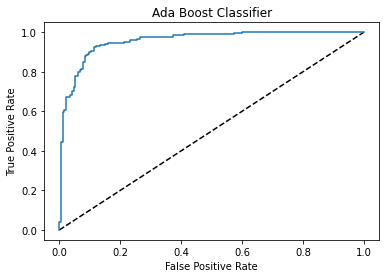

In [89]:
#plotting roc curves
plt.plot([0,1],[0,1],'k--')  #([x-axis],[y-axis],broken lines)
plt.plot(fpr,tpr,label='Ada Boost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ada Boost Classifier')
plt.show()

AUC curve is fine

# Saving Model

In [90]:
import joblib as jb
jb.dump(best,"Best_Insurance.pkl")

['Best_Insurance.pkl']

Saved model

# Conclusion

In [91]:
a=np.array(y_test)
predicted=np.array(best.predict(x_test))
INSURANCE=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
INSURANCE

,Original:,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
372,0,0
373,1,1
374,1,1
375,1,1
